# Feature angineering

**Purpose of script:**

Creating new features 

In [22]:
# imports
import pandas as pd
import numpy as np

In [23]:
# paths
df_path = r"../Data/combined/"

out_path = r"../Data/combined/"

In [24]:
# data load 
#df = pd.read_csv(df_path + 'melt_2019-07-01.csv')
df = pd.read_parquet(df_path + 'melt_2019-07-01.parquet.gzip')

In [25]:
df

,x,y,mw_value,opt_value,col,row,v1,v2,v3,v4,v5,v6,v7,v8,v9
0,186500.0,-678500.0,0.0,0.016349,823,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,187500.0,-678500.0,0.0,0.000484,824,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,185500.0,-679500.0,0.0,0.000385,822,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,186500.0,-679500.0,0.0,0.188975,823,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,187500.0,-679500.0,0.0,0.236826,824,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752685,71500.0,-3268500.0,0.0,0.017829,708,2606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
752686,66500.0,-3269500.0,0.0,0.015932,703,2607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
752687,64500.0,-3270500.0,0.0,0.014779,701,2608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
752688,65500.0,-3270500.0,0.0,0.014123,702,2608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Features:

In script 05:
- Column and row numbers
- Neighboring pixels
- Water pixels from mw removed 
- Masked pixels from opt removed


Date

In [26]:
df['date'] = '2019-07-01'
df["date"]= pd.to_datetime(df["date"])
# df['month'] = df["date"].dt.month

Aggregated/pooled values

In [27]:
# delet v5? same as mw value

In [28]:
cols = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']

In [29]:
df[cols] = df[cols].replace(-1, np.NaN) # to skip -1 when calculating mean
df['mean'] = df[cols].mean(axis = 1) # mean value of 9 pixels around

Elevation data

In [16]:
import xarray
import rasterio

In [1]:
path_elevation =  r"../Data/elevation_data/Greenland_1km.tif"
data_elevation = xarray.open_dataarray(path_elevation)


In [17]:
with rasterio.open(path_elevation) as dataset_elev:
    print(dataset_elev.crs)
# reference system matches opt an mw data

print(data_elevation.shape) # shape seems same as optical data

EPSG:3413


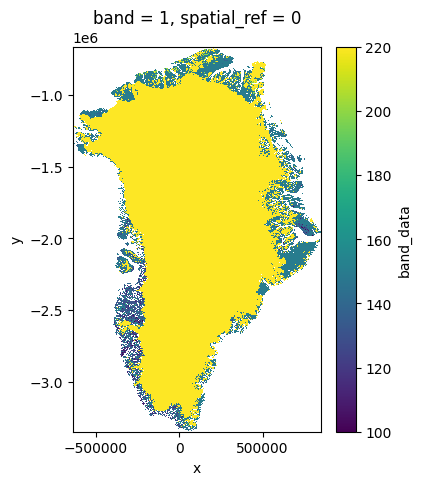

In [12]:
# import matplotlib.pyplot as plt
# fig, axes = plt.subplots(ncols=1, figsize=(4,5))
# data_elevation.plot(ax=axes) # , cmap = cmap
# plt.draw()

In [32]:
df_elevation = data_elevation.to_dataframe()
df_elevation = df_elevation.reset_index()
df_elevation = df_elevation[['x', 'y', 'band_data']]
df_elevation.rename({'band_data': 'elevation_data'}, axis=1, inplace=True)

In [33]:
df_elevation

,x,y,elevation_data
0,-636500.0,-662500.0,NaN
1,-635500.0,-662500.0,NaN
2,-634500.0,-662500.0,NaN
3,-633500.0,-662500.0,NaN
4,-632500.0,-662500.0,NaN
...,...,...,...
3995564,845500.0,-3348500.0,NaN
3995565,846500.0,-3348500.0,NaN
3995566,847500.0,-3348500.0,NaN
3995567,848500.0,-3348500.0,NaN


In [34]:
# merge
df_with_elevation = pd.merge(df, df_elevation, how = 'left', on = ['y', 'x']) # left smaller mw, right - opt

In [35]:
df_with_elevation

,x,y,mw_value,opt_value,col,row,v1,v2,v3,v4,v5,v6,v7,v8,v9,date,mean,elevation_data
0,186500.0,-678500.0,0.0,0.016349,823,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-01,0.0,150.0
1,187500.0,-678500.0,0.0,0.000484,824,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-01,0.0,150.0
2,185500.0,-679500.0,0.0,0.000385,822,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-01,0.0,150.0
3,186500.0,-679500.0,0.0,0.188975,823,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-01,0.0,150.0
4,187500.0,-679500.0,0.0,0.236826,824,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-01,0.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752685,71500.0,-3268500.0,0.0,0.017829,708,2606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-01,0.0,150.0
752686,66500.0,-3269500.0,0.0,0.015932,703,2607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-01,0.0,150.0
752687,64500.0,-3270500.0,0.0,0.014779,701,2608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-01,0.0,150.0
752688,65500.0,-3270500.0,0.0,0.014123,702,2608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-01,0.0,150.0


Distance from margin/shore

In [ ]:
# add if coast column - if at least one na but not all 

Geohash

In [ ]:
# convert x and y to useful sections of geodata

Write

In [36]:
df_with_elevation.to_parquet(out_path + 'melt_2019-07-01_extended.parquet.gzip', index= False)